# PCA on images

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

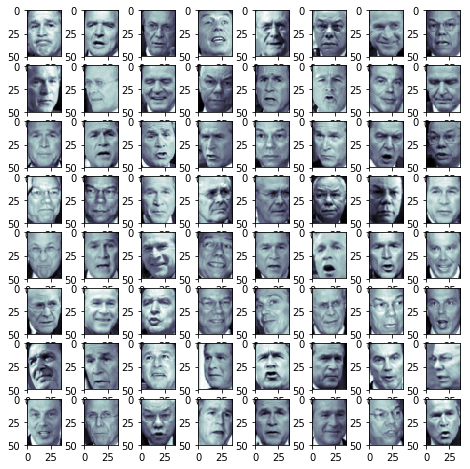

In [6]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.99:
    currentSum+=pca.explained_variance_[k]
    k+=1
k

316

In [9]:
x.shape

(1140, 1850)

In [10]:
x_train.shape

(855, 1850)

In [11]:
pca_lfw=PCA(n_components=k,whiten=True)
transformed_data=pca_lfw.fit_transform(x_train)
transformed_data.shape

(855, 316)

In [12]:
x_approx=pca_lfw.inverse_transform(transformed_data)
x_approx=x_approx.reshape((855,50,37))
x_approx.shape

(855, 50, 37)

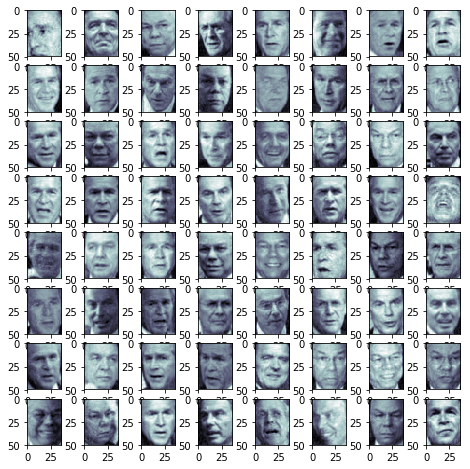

In [13]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [14]:
pca.components_.shape

(855, 1850)

In [15]:
eigenv=pca.components_.reshape(855,50,37)
eigenv.shape

(855, 50, 37)

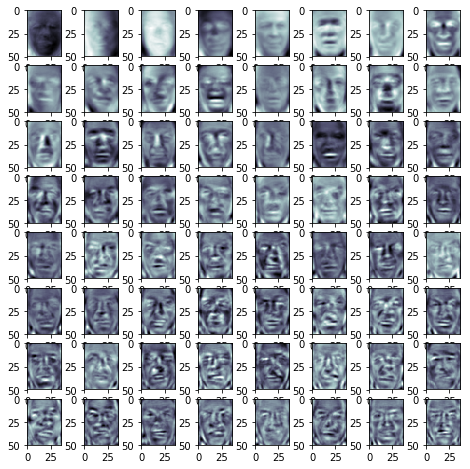

In [16]:

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [17]:
x_train_pca=transformed_data
x_test_pca=pca_lfw.transform(x_test)

In [18]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.17395806312561035
             precision    recall  f1-score   support

          0       0.61      0.67      0.64        61
          1       0.47      0.22      0.30        36
          2       0.63      0.94      0.76       122
          3       0.56      0.16      0.25        31
          4       0.50      0.14      0.22        35

avg / total       0.58      0.61      0.55       285

[[ 41   1  17   0   2]
 [ 12   8  14   1   1]
 [  6   1 115   0   0]
 [  4   3  17   5   2]
 [  4   4  19   3   5]]


In [19]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.13456082344055176
             precision    recall  f1-score   support

          0       0.41      0.39      0.40        61
          1       0.29      0.11      0.16        36
          2       0.50      0.79      0.61       122
          3       0.44      0.13      0.20        31
          4       0.27      0.09      0.13        35

avg / total       0.42      0.46      0.41       285

[[24  2 33  0  2]
 [ 6  4 23  1  2]
 [17  3 96  3  3]
 [ 4  3 19  4  1]
 [ 8  2 21  1  3]]
